In [118]:
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit_aer import AerSimulator
backend = AerSimulator()
import numpy as np
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt  
%matplotlib inline

# from qiskit.visualization import plot_circuit_layout, plot_histogram
# from qiskit.circuit.library import UnitaryGate

# Grover Coin:

### a. Vertex \( j \)
- **Role**: Represents the current position of the quantum walker on the graph.
- **Selection**: Determines which column of the probability matrix \( P \) is used to construct the coin operator \( C_j \).

### b. Initial State
- **Position Register**: Encoded by the qubits in the coin register. In this example, the initial state is set to \( |01> \).
- **Coin Register**: Determines the superposition of possible transitions from the current vertex.

### c. Coin Operator \( C_j \)
- **Function**: Creates a superposition in the coin register based on the transition probabilities from vertex \( j \).
- **Construction**: Derived from the Grover diffusion operator, reflecting the state about the desired superposition \( |psi_j> \).

### d. Propagating the Walk
- **Coin Operator**: Prepares the coin register in a superposition state reflecting the transition probabilities.
- **Shift Operator**: *(Not implemented here)* Moves the walker to a new position based on the coin register's state.
- **Iteration**: Repeating the application of the coin and shift operators propagates the walker through the graph.


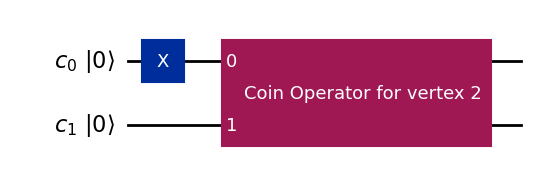

Statevector after applying the coin operator for vertex 2:
|00>: amplitude = (0.6000000000000002+0j)
|01>: amplitude = (-0.3999999999999998+0j)
|11>: amplitude = (0.6928203230275511+0j)


In [119]:
# Define the number of vertices
N = 4

# Define your arbitrary probability matrix P 
P = np.array([
    [0,   0.4, 0.3, 0.3],
    [0.4, 0,   0.3, 0.5],
    [0.3, 0.3, 0,   0.2],
    [0.3, 0.3, 0.4, 0],
])

# Verify that each column sums to 1
assert np.allclose(P.sum(axis=0), np.ones(N)), "Each column of P must sum to 1"

# Number of qubits required for the coin register 
n_qubits = int(np.ceil(np.log2(N)))

# Function to construct the coin operator
def arbitrary_coin_operator(P_col, n_qubits):
    """Constructs the coin operator for a given probability column P_col."""
    amplitudes = np.sqrt(P_col)
    dimension = 2 ** n_qubits
    if len(amplitudes) < dimension:
        amplitudes = np.pad(amplitudes, (0, dimension - len(amplitudes)), 'constant')
    amplitudes = amplitudes / np.linalg.norm(amplitudes)
    desired_state = amplitudes
    projector = np.outer(desired_state, np.conj(desired_state))
    identity = np.identity(len(desired_state))
    C_j_matrix = 2 * projector - identity
    return Operator(C_j_matrix)

# Create the coin register and quantum circuit
coin_r = QuantumRegister(n_qubits, name='c')
qc = QuantumCircuit(coin_r)

# Choose the first state: 
# Flip the first qubit to create |01⟩
qc.x(0)  

# Choose a vertex j
j = 2

# Apply the coin operator
C_j_gate = arbitrary_coin_operator(P[:, j], n_qubits)
qc.unitary(C_j_gate, coin_r[:], label=f"Coin Operator for vertex {j}")
qc.draw(output="mpl", initial_state=True)
plt.show()
# Simulate the circuit
qc.save_statevector()
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
results = simulator.run(transpiled_qc).result()
statevector = results.get_statevector()

# Print results
statevector = np.asarray(statevector)
print(f"Statevector after applying the coin operator for vertex {j}:")
for idx, amplitude in enumerate(statevector):
    if np.abs(amplitude) > 1e-6:
        state_bin = format(idx, '0{}b'.format(n_qubits))
        print(f"|{state_bin}>: amplitude = {amplitude}")
